In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


SyntaxError: invalid syntax (<ipython-input-140-e309c1939fbf>, line 5)

In [103]:
df = pd.read_csv("primary_data.csv")

In [104]:
def remove_outliers(data, bairro, coluna):
    print("Dados de entrada:")
    print("Bairro:", bairro)
    print("Coluna:", coluna)
    q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([.25,.75])
    iqr = q3-q1
    lb = max(q1-1.5*iqr,0)
    ub = q3+1.5*iqr
    print(q1,q3, iqr, lb, ub)
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    data.loc[(data["bairro"] == bairro) & (~data[coluna].between(lb,ub)),coluna] = np.nan
    len_after = ~data.loc[data["bairro"] == bairro, coluna].isnull()
    print(len_before, len_after)
    return data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

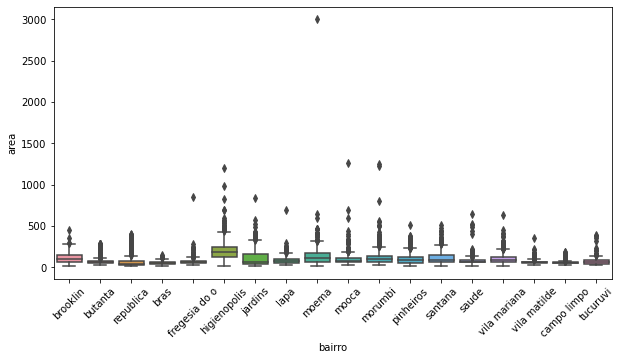

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x = "bairro")
plt.xticks(rotation=45)

In [106]:
df = remove_outliers(df,"moema", "area")

Dados de entrada:
Bairro: moema
Coluna: area
68.0 170.0 102.0 0 323.0
768 6657    True
6658    True
6659    True
6660    True
6661    True
        ... 
7420    True
7421    True
7422    True
7423    True
7424    True
Name: area, Length: 768, dtype: bool


In [107]:
df.loc[df["bairro"]== "moema","area"].max()

315.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

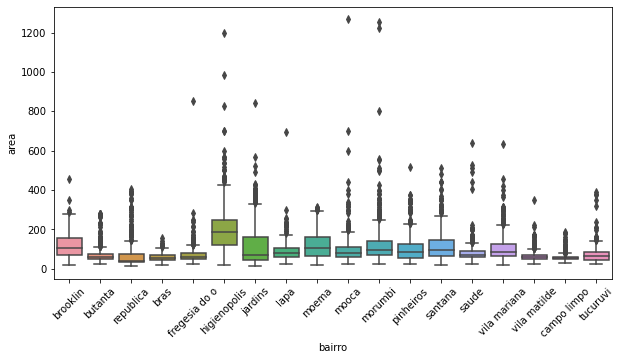

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x = "bairro")
plt.xticks(rotation=45)

In [117]:
df["rooms"].value_counts(normalize=True)

2 Quartos     0.398728
3 Quartos     0.361497
1 Quarto      0.153448
4 Quartos     0.082001
5 Quartos     0.002687
6 Quartos     0.000524
16 Quartos    0.000393
20 Quartos    0.000328
18 Quartos    0.000131
15 Quartos    0.000066
8 Quartos     0.000066
17 Quartos    0.000066
14 Quartos    0.000066
Name: rooms, dtype: float64

In [129]:
df.loc[df["rooms"]>"6","rooms"]


250      6 Quartos
3830     6 Quartos
4417     6 Quartos
6768     6 Quartos
7975     6 Quartos
8521     6 Quartos
8879     6 Quartos
12564    6 Quartos
14265    8 Quartos
Name: rooms, dtype: object

In [131]:
df[np.abs(zscore(df["area"])) < 2]

NameError: name 'zscore' is not defined

In [137]:
df["rooms"]

0        2 Quartos
1        3 Quartos
2        3 Quartos
3        3 Quartos
4        4 Quartos
           ...    
15251    2 Quartos
15252     1 Quarto
15253    2 Quartos
15254    3 Quartos
15255     1 Quarto
Name: rooms, Length: 15256, dtype: object